<a href="https://colab.research.google.com/github/Someshwarms/ML-DL-Project/blob/main/spam_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import tqdm
import matplotlib.pyplot as plt

In [ ]:
sequence_length=100
embedding_size=100
test_size=0.25
batch_size=64
epochs=10
data_path="/content/drive/MyDrive/SMSSpamCollection"

In [ ]:
label2int = {"ham": 0, "spam": 1}
int2label = {0: "ham", 1: "spam"}

In [ ]:
def load_data():
  texts=[]
  labels=[]
  with open(data_path,'r',encoding="utf-8") as f:
    for line in f:
      split=line.split()
      labels.append(split[0].strip())
      texts.append(' '.join(split[1:]).strip())
  return texts,labels

In [ ]:
X,y=load_data()

In [ ]:
X

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had you

In [ ]:
y

['ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'h

In [ ]:
tokenizer=tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X)
X=tokenizer.texts_to_sequences(X)

In [ ]:
print(X[0])

[49, 471, 4435, 842, 755, 658, 64, 8, 1327, 88, 123, 351, 1328, 148, 2996, 1329, 67, 58, 4436, 144]


In [ ]:
X=np.array(X)
y=np.array(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
X=tf.keras.preprocessing.sequence.pad_sequences(X,maxlen=sequence_length)

In [ ]:
print(X[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0   49  471 4435  842
  755  658   64    8 1327   88  123  351 1328  148 2996 1329   67   58
 4436  144]


In [ ]:
y=[label2int[label] for label in y]
y=tf.keras.utils.to_categorical(y)

In [ ]:
print(y[0])

[1. 0.]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=7)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4180, 100), (4180, 2), (1394, 100), (1394, 2))

In [ ]:
X_train

array([[   0,    0,    0, ...,  303, 1047,  354],
       [   0,    0,    0, ...,  246,   81,   20],
       [   0,    0,    0, ...,   61, 6305, 6306],
       ...,
       [   0,    0,    0, ...,  104,  226,   43],
       [   0,    0,    0, ...,  553,  166, 2180],
       [   0,    0,    0, ...,    3,    2,   90]], dtype=int32)

In [ ]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
def get_embedding_vectors(tokenizer, dim=100):
    embedding_index = {}
    data="/content/glove.6B.100d.txt"
    with open(data,'r',encoding='utf8') as f:
        for line in tqdm.tqdm(f, "Reading GloVe"):
            values = line.split()
            word = values[0]
            vectors = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = vectors

    word_index = tokenizer.word_index
    embedding_matrix = np.zeros((len(word_index)+1, dim))
    for word, i in word_index.items():
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            # words not found will be 0s
            embedding_matrix[i] = embedding_vector
            
    return embedding_matrix

In [ ]:
def get_model(tokenizer,lstm_units):
  embedding_matrix=get_embedding_vectors(tokenizer)
  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Embedding(len(tokenizer.word_index)+1,embedding_size,weights=[embedding_matrix],trainable=False,input_length=sequence_length))
  model.add(tf.keras.layers.LSTM(lstm_units,recurrent_dropout=0.2))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Dense(2,activation="softmax"))
  model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
  model.summary()
  return model

In [ ]:
model=get_model(tokenizer=tokenizer,lstm_units=128)

Reading GloVe: 400000it [00:12, 31268.05it/s]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          901000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 1,018,506
Trainable params: 117,506
Non-trainable params: 901,000
_________________________________________________________________


In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test, y_test),batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/10
66/66 [==============================] - 37s 555ms/step - loss: 0.0700 - accuracy: 0.9778 - precision: 0.9778 - recall: 0.9778 - val_loss: 0.1052 - val_accuracy: 0.9634 - val_precision: 0.9634 - val_recall: 0.9634
Epoch 2/10
66/66 [==============================] - 36s 552ms/step - loss: 0.0525 - accuracy: 0.9837 - precision: 0.9837 - recall: 0.9837 - val_loss: 0.0778 - val_accuracy: 0.9735 - val_precision: 0.9735 - val_recall: 0.9735
Epoch 3/10
66/66 [==============================] - 37s 555ms/step - loss: 0.0477 - accuracy: 0.9849 - precision: 0.9849 - recall: 0.9849 - val_loss: 0.0844 - val_accuracy: 0.9699 - val_precision: 0.9699 - val_recall: 0.9699
Epoch 4/10
66/66 [==============================] - 37s 564ms/step - loss: 0.0388 - accuracy: 0.9890 - precision: 0.9890 - recall: 0.9890 - val_loss: 0.0974 - val_accuracy: 0.9692 - val_precision: 0.9692 - val_recall: 0.9692
Epoch 5/10
66/66 [==============================] - 37s 560ms/step - loss: 0.0335 - accuracy: 0.9909

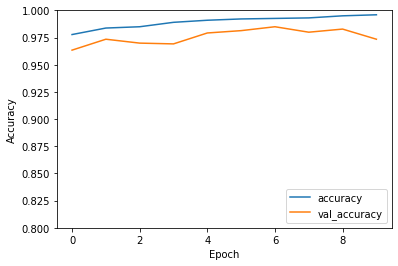

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

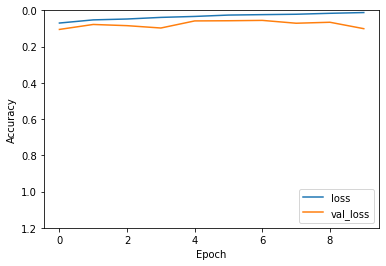

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([1.2, 0])
plt.legend(loc='lower right')

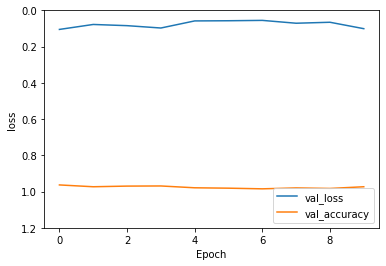

In [ ]:
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([1.2,0])
plt.legend(loc='lower right')

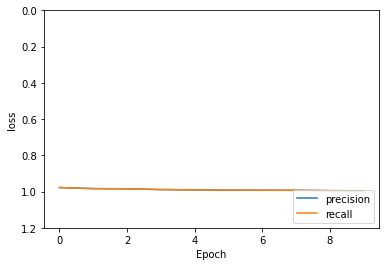

In [ ]:
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['recall'], label = 'recall')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([1.2,0])
plt.legend(loc='lower right')

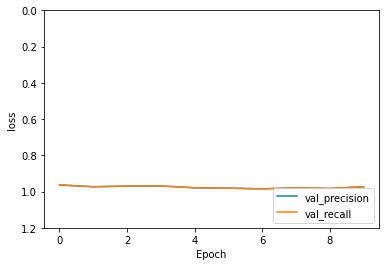

In [ ]:
plt.plot(history.history['val_precision'], label='val_precision')
plt.plot(history.history['val_recall'], label = 'val_recall')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([1.2,0])
plt.legend(loc='lower right')

In [ ]:
result=model.evaluate(X_test,y_test)
loss=result[0]
accuracy=result[1]
precision=result[2]
recall=result[3]
print("Loss:",loss*100)
print("Accuracy:",accuracy*100)
print("Precision:",precision*100)
print("Recall:",recall*100)

44/44 [==============================] - 2s 44ms/step - loss: 0.1011 - accuracy: 0.9735 - precision: 0.9735 - recall: 0.9735
Loss: 10.107287019491196
Accuracy: 97.34576940536499
Precision: 97.34576940536499
Recall: 97.34576940536499


In [ ]:
def get_prediction(text):
  sequence=tokenizer.texts_to_sequences([text])
  sequence=tf.keras.preprocessing.sequence.pad_sequences(sequence,maxlen=sequence_length)
  prediction=model.predict(sequence)[0]
  return int2label[np.argmax(prediction)]

In [ ]:
text = "Hi 83568056XX , 3000 Bonus on Howzat!CHN vs BAN T20 Match Prize Pool - 20,00,000(20Lac) Entry Fee - 42 Only"
get_prediction(text)

'spam'

In [ ]:
text="Recharge your Jio no. 8356805603 today on Paytm with Rs.199 plan." 
get_prediction(text)

'ham'